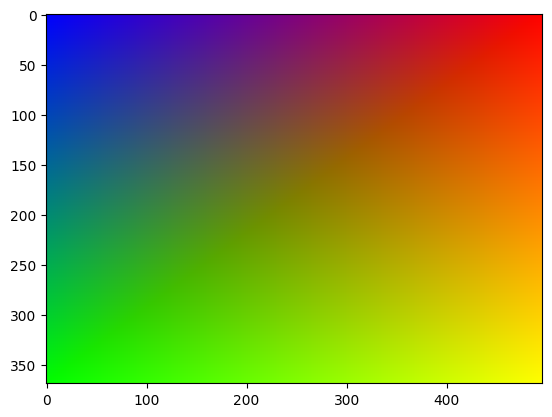

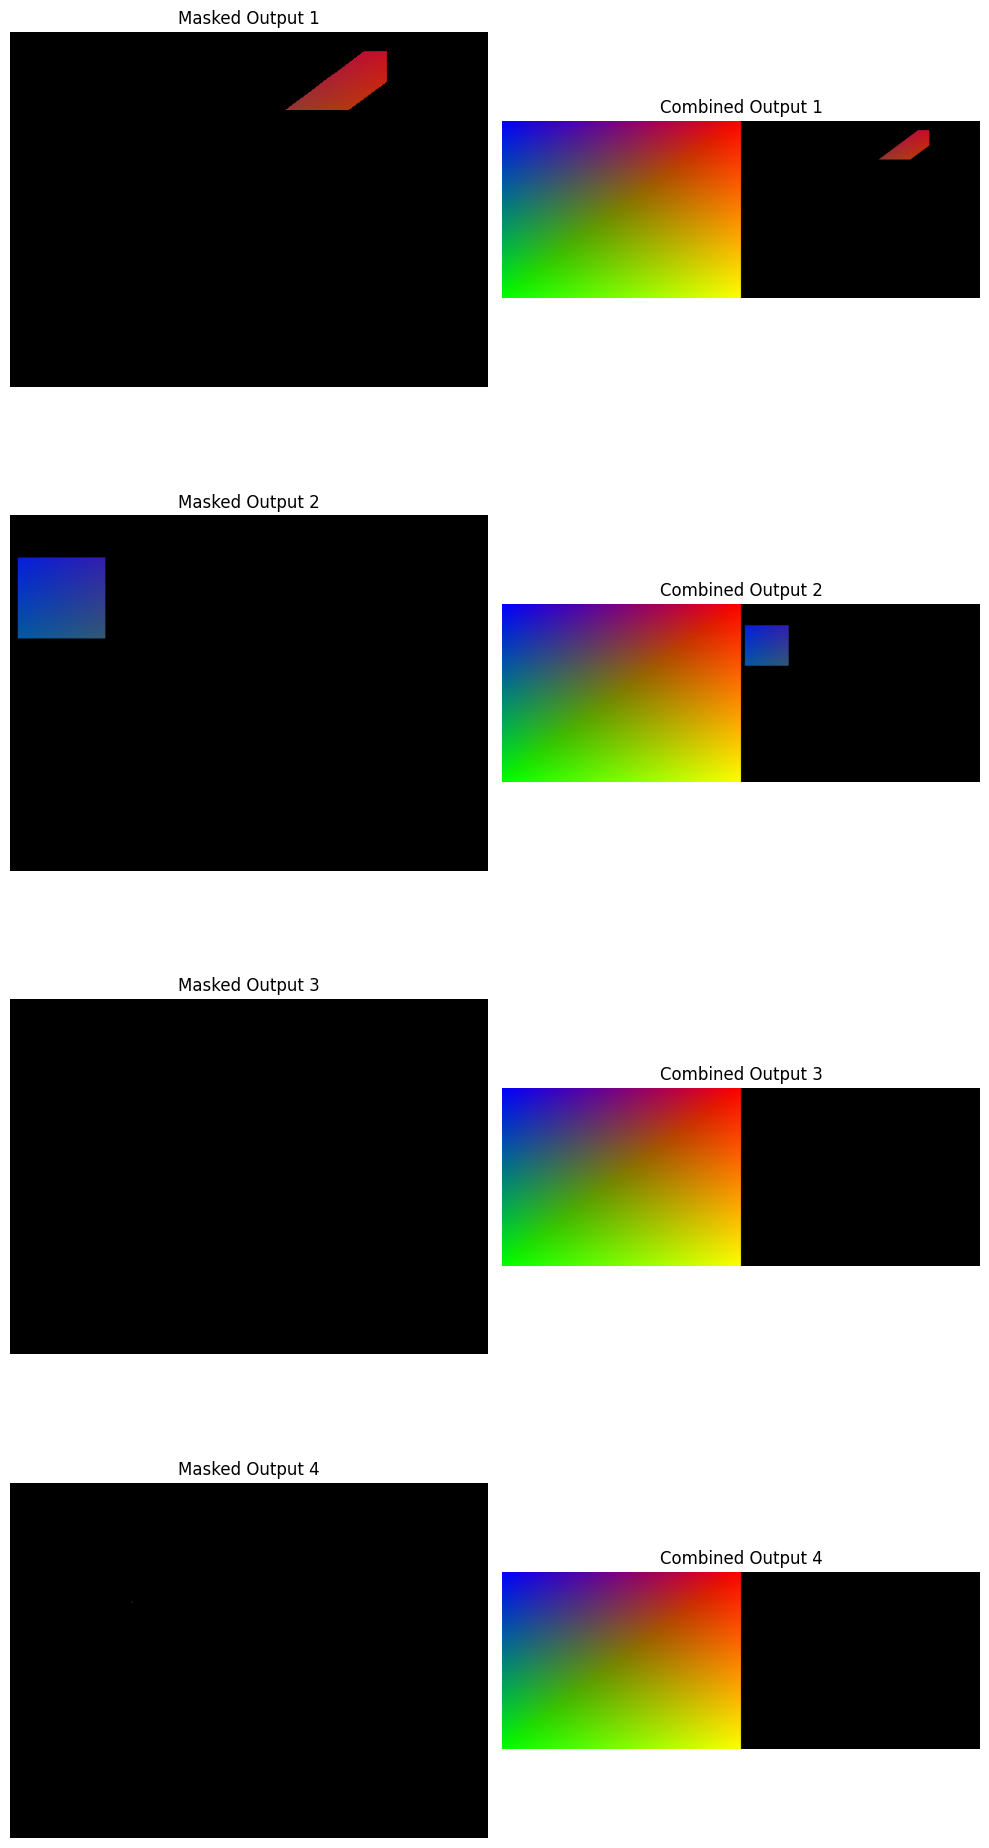

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_path = './images/gradient.png'

# Load the image
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show the original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Define the list of boundaries
boundaries = [
    ([17, 15, 100], [50, 56, 200]),
    ([86, 31, 4],   [220, 88, 50]),
    ([25, 146, 190],[62, 174, 250]),
    ([103, 86, 65], [145, 133, 128])
]

# Set up the subplot grid
num_boundaries = len(boundaries)
fig, axes = plt.subplots(num_boundaries, 2, figsize=(10, 5 * num_boundaries))

# Show the original image in the first row
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')  # Turn off axis

# Loop over the boundaries and create masks
for i, (lower, upper) in enumerate(boundaries):
    # Create NumPy arrays from the boundaries
    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")

    # Find the colors within the specified boundaries and apply the mask
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask=mask)

    # Show the masked output in the second column
    axes[i, 0].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title(f'Masked Output {i + 1}')
    axes[i, 0].axis('off')  # Turn off axis

    # Show the original image with applied mask in the second column
    combined = np.hstack([image, output])
    axes[i, 1].imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
    axes[i, 1].set_title(f'Combined Output {i + 1}')
    axes[i, 1].axis('off')  # Turn off axis

# Adjust layout
plt.tight_layout()
plt.show()